In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
num_obj = 656

with open('LearnRes_6_norm.txt', mode='r', encoding='cp1252') as f: 
    text = f.readlines()

arr = np.zeros((len(text), num_obj))

arr.shape

(168, 656)

In [3]:
k = [266, 350, 446, 537, 592, 655]

s = [k[num] - k[num-1] for num in range(1, len(k)) ]

s =  [k[0] + 1] + s


y = []
y_size = []
for num, val in enumerate(s):
    for j in range(val):
        y.append(num)
        y_size.append(1 / val)
y = np.array(y)

In [4]:
for line_num, line in enumerate(text):
    indices = [int(ind) - 1 for ind in line.split(": ")[1].replace("<b>", "").replace("</b>", "").split(" ") if ind.isdigit()]
    arr[line_num, indices] = 1

In [5]:
norm_const = []
for num, val in enumerate(s):
    for j in range(val):
        norm_const.append(val+1)

In [6]:
norm = np.sum(arr, axis=1)

In [8]:
X = np.loadtxt("matrix.txt")
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X.shape

(656, 88)

In [10]:
from scipy.special import expit

In [11]:
G = np.sum((norm[:, np.newaxis] * arr / norm_const), axis=0)

ind_sorted = np.argsort(-G)
sorted_G = G[ind_sorted]

(array([ 107.,   31.,   21.,   33.,   32.,    3.,   21.,  106.,  115.,  187.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

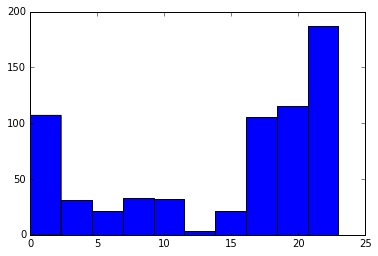

In [58]:
plt.hist(G)

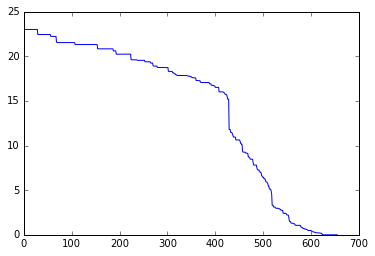

In [59]:
plt.plot(G[ind_sorted])

In [77]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier()
}

In [92]:
def cross_val(X, y, X_err, y_err, model):
    
    X = np.array(X)
    y = np.array(y)
    score = []
    
    n = X.shape[0]
    num_groups = min(14, n)
    coeff = X_err.shape[0] / n
    
    kf = KFold(n_splits=num_groups)
    kf.get_n_splits(X, y)
    
    KFold(n_splits=2, random_state=None, shuffle=False)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        try:
            model.fit(X_train, y_train)
        except ValueError:
            return 0
 
        try:
            pred = model.predict(X_test)
        except ValueError:
            return 0
        
        try:
            pred_err = model.predict(X_err)
        except ValueError:
            return 0
            
        acc_err = accuracy_score(pred_err, y_err) * coeff
        
        score.append(accuracy_score(pred, y_test) * (1 - coeff) + acc_err)
        
    return np.array(score).mean()      


In [52]:
def test(X, y, model):
    print(X.shape, y.shape)
    result = [cross_val(X, y, np.array([[]]), np.array([]), model)]


    for i in range(1, len(ind_sorted)-1):

        to_del_X = X.copy()
        to_del_X = to_del_X.tolist()
        to_del_y = y.copy()
        to_del_y = to_del_y.tolist()
        
        a = sorted(ind_sorted[:i], key=lambda x: -x)
        
        X_err = np.zeros((len(a), X.shape[1]))
        y_err = np.zeros((len(a)))
        
        for num, j in enumerate(a):
            X_err[num, :] = to_del_X[j]
            y_err[num] = to_del_y[j]
            del to_del_X[j]
            del to_del_y[j]
        
        result.append(cross_val(to_del_X, to_del_y, X_err, y_err, model))
    
    return np.array(result)

In [ ]:
def shuffle_data(X, y):
    shuffle = np.arange(np.size(y))
    np.random.shuffle(shuffle)
    return X[shuffle], np.array(y)[shuffle]

Random Forest Classifier
(656, 88) (656,)
(655,)
Logistic Regression
(656, 88) (656,)


/Users/tatiana/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(655,)
KNeighbors Classifier
(656, 88) (656,)
(655,)
Ridge Classifier
(656, 88) (656,)
(655,)


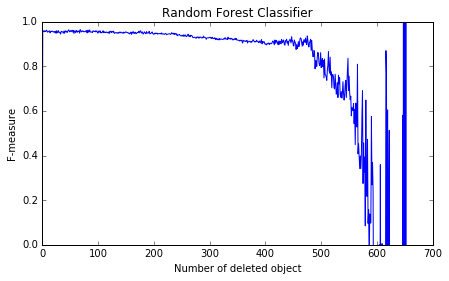

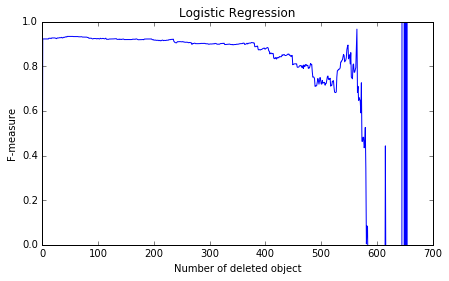

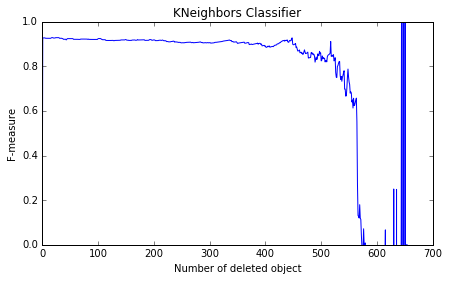

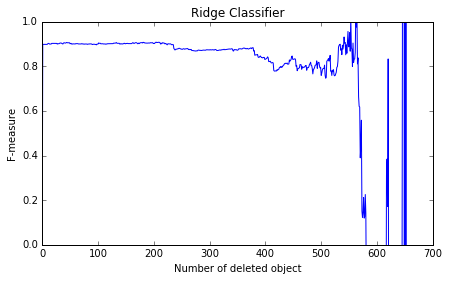

In [93]:
 for name, model in models.items():
    print (name)
    plt.figure(figsize=(7, 4))
    
    plt.xlabel('Number of deleted object')
    plt.ylabel('F-measure')
    plt.title(name)
    plt.ylim(0, 1)
    
    res = test(X, y, model)
    print (res.shape)
    plt.plot(res)
    plt.legend()